In [23]:
%display latex

# Problema 1
Si se supone que el arrastre es proporcional al cuadrado de la velocidad, se puede modelar la velocidad de un objeto que cae, como un paracaidista, por medio de la ecuacion diferencial siguiente:
$$\frac{dv}{dt} = g-\frac{c_d}{m}v^2$$
donde $v$ es a velocidad (m/s) $t=$ tiempo(s), $g$ esla aceleración de la gravedad $g=(9.81\frac{m}{s^2})$, $c_d=$coeficiente de arraste ($\frac{kg}{m})$ y $m=$masa(kg). Resuelva para la velocidad y distancia que recorre un objeto de $90kg$ con coeficifiente de arrastre de $0.225\frac{kg}{m}$. Si la altura inicial es de $1 km$, determine en qué momento choca con el suelo.

1. Obtenenga la solucion de manera analítica.

In [42]:
c_d = 0.225
m = 90
g = 9.81
t = var("t")
v = function("v")(t)
assume("t>0")

desolve(diff(v,t)+c_d/m*v^2==g,dvar=v,ivar=t)

-100/327*sqrt(109)*log(-(6*sqrt(109) - v(t))/(6*sqrt(109) + v(t))) == _C + t

In [43]:
v

v(t)

In [44]:
c_d = var("c_d")
m = var("m")
g = var("g")
b = var("b")
t = var("t")
v = function("v")(t)


assume(c_d>0)
assume(m>0)
assume(g>0)
assume(t>0)
assume(b>0)

desolve(diff(v,t)==g-b*v^2,dvar=v,ivar=t)

-1/2*log((b*v(t) - sqrt(b*g))/(b*v(t) + sqrt(b*g)))/sqrt(b*g) == _C + t

In [45]:
a = var("a")
k = var("k")
y = function("y")(t)
assume(a>0)
assume(k>0)
desolve(diff(y,t)==a*(e^(-k*t)-1)/(e^(-k*t)+1),dvar=y,ivar=t)

a*t + _C - 2*a*log(e^(k*t) + 1)/k

In [46]:
a*(e^(-k*t)-1)/(e^(-k*t)+1)

a*(e^(-k*t) - 1)/(e^(-k*t) + 1)

Hacemos $b=\frac{c_d}{m}$, entonces:
$$\frac{dv}{dt}=g-bv^2$$
$$\frac{dv}{(\sqrt{g}-\sqrt{b}v)(\sqrt{g}+\sqrt{b}v)}=dt$$
$$-\frac{1}{2\sqrt{g}}( \frac{1}{\sqrt{b}v-\sqrt{g}}-\frac{1}{\sqrt{b}v+\sqrt{g}} )dv=dt$$
$$-\frac{1}{2\sqrt{g}}\ln{|\frac{\sqrt{b}v-\sqrt{g}}{\sqrt{b}v+\sqrt{g}}|}= t + C$$
$$\ln{|\frac{\sqrt{b}v-\sqrt{g}}{\sqrt{b}v+\sqrt{g}}|}=-2\sqrt{bg}t+\ln{C_1}$$
$$\frac{\sqrt{b}v-\sqrt{g}}{\sqrt{b}v+\sqrt{g}}=C_1e^{-2\sqrt{bg}t}$$

Como en $t=0$, $v=0$, por lo tanto:  $$C_1=-1$$
Entonces:
$$\frac{\sqrt{b}v-\sqrt{g}}{\sqrt{b}v+\sqrt{g}}=-e^{-2\sqrt{bg}t}$$
Despegando $v$:
$$v=\frac{\sqrt{g}}{\sqrt{b}} \frac{1-e^{-2\sqrt{bg}t}}{1+e^{-2\sqrt{bg}t}}$$

Reemplazando $b=\frac{c_d}{m}$
$$v=\sqrt{\frac{g}{b}} \frac{1-e^{-2\sqrt{bg}t}}{1+e^{-2\sqrt{bg}t}}$$

$$v=\sqrt{\frac{gm}{c_d}}\frac{1-e^{-2\sqrt{\frac{c_dg}{m}}t}}{1+e^{-2\sqrt{\frac{c_dg}{m}}t}}$$

Hacemos $a=\sqrt{\frac{g}{b}}$ y $k=2\sqrt{bg}$ ,entonces
$$v=a\frac{1-e^{-kt}}{1+e^{-kt}}$$
Como $dy=-vdt$, entonces:
$$dy=a\frac{e^{-kt}-1}{e^{-kt}+1}dt$$


Integrando ambas partes:
$$y=a\int\frac{e^{-kt}-1}{e^{-kt}+1}dt$$
$$y=a\int\frac{-(e^{-kt}+1)+2e^{kt}}{e^{-kt}+1}dt$$
$$y=a\int-dt-\frac{2}{k}\frac{d(e^{-kt}+1)}{e^{-kt}+1}$$
$$y=-at-\frac{2a}{k}\ln{(e^{-kt}+1)}+C$$

Como en $t=0$, $y=1$, por lo tanto:
$$1=-\frac{2a}{k}\ln{(2)}+C$$
$$C=1+\frac{2a}{k}\ln{(2)}$$
Por lo que :
$$y=-at-\frac{2a}{k}\ln{(e^{-kt}+1)}+1+\frac{2a}{k}\ln{(2)}$$

In [47]:
c_d = 0.225
m = 90
g = 9.81

b = c_d/m
a = sqrt(g/b)
k = 2*sqrt(g*b)

t = var("t")
v = function("v")(t)
y = function("y")(t)

v = a*(1-e^(-k*t))/(1+e^(-k*t))
y = -a*t-2*a/k*ln(e^(-k*t)+1)+1+2*a/k*ln(2)


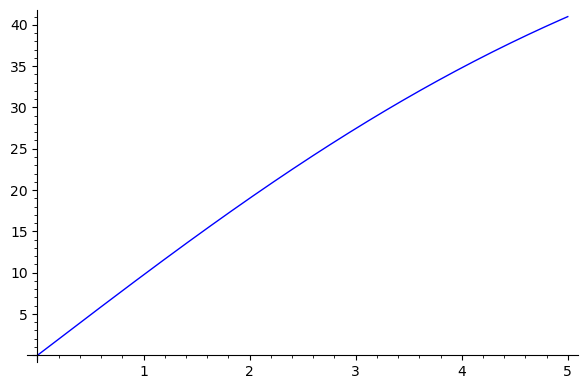

In [48]:
plot(v, (t,0,5))

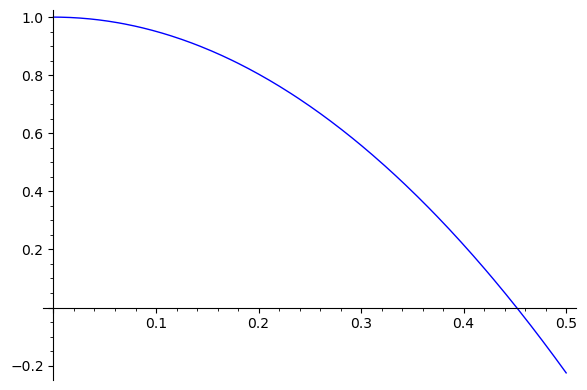

In [49]:
plot(y, (t,0,0.5))

In [51]:
assume(t>0)
t_sol=find_root(y==0,0,0.5)
N(t_sol)

0.451711799332117

2.  Hallar hasta la sexta aproximacion con el metodo de Aproximaciones Susesivas

## Velocidad

In [11]:
c_d = 0.225
m = 90
g = 9.81

x = var('x')
t = var("t")
f(x,y) = g-c_d/m*y^2

y_0 = 0
y_1 = y_0 + integrate(f(t,y_0),t)(x)    - integrate(f(t,y_0),t)(0)
y_2 = y_0 + integrate(f(t,y_1(t)),t)(x) - integrate(f(t,y_1(t)),t)(0)
y_3 = y_0 + integrate(f(t,y_2(t)),t)(x) - integrate(f(t,y_2(t)),t)(0)
y_4 = y_0 + integrate(f(t,y_3(t)),t)(x) - integrate(f(t,y_3(t)),t)(0)
y_5 = y_0 + integrate(f(t,y_4(t)),t)(x) - integrate(f(t,y_4(t)),t)(0)
y_6 = y_0 + integrate(f(t,y_5(t)),t)(x) - integrate(f(t,y_5(t)),t)(0)



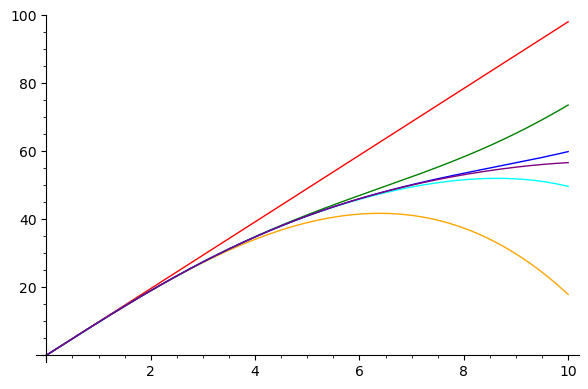

In [13]:
G1 = plot(y_1,(0,10),color="red")
G2 = plot(y_2,(0,10),color="orange")
G3 = plot(y_3,(0,10),color="green")
G4 = plot(y_4,(0,10),color="cyan")
G5 = plot(y_5,(0,10),color="blue")
G6 = plot(y_6,(0,10),color="purple")
G1+G2+G3+G4+G5+G6

## Posición

In [23]:
f(x,y) = -y_6(x)
y_0 = 1
y_1 = y_0 + integrate(f(t,y_0),t)(x)    - integrate(f(t,y_0),t)(0)
y_2 = y_0 + integrate(f(t,y_1(t)),t)(x) - integrate(f(t,y_1(t)),t)(0)
y_3 = y_0 + integrate(f(t,y_2(t)),t)(x) - integrate(f(t,y_2(t)),t)(0)
y_4 = y_0 + integrate(f(t,y_3(t)),t)(x) - integrate(f(t,y_3(t)),t)(0)
y_5 = y_0 + integrate(f(t,y_4(t)),t)(x) - integrate(f(t,y_4(t)),t)(0)
y_6 = y_0 + integrate(f(t,y_5(t)),t)(x) - integrate(f(t,y_5(t)),t)(0)



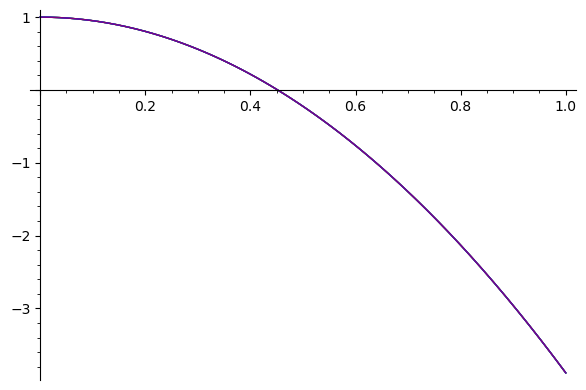

In [24]:
G1 = plot(y_1,(0,1),color="red")
G2 = plot(y_2,(0,1),color="orange")
G3 = plot(y_3,(0,1),color="green")
G4 = plot(y_4,(0,1),color="cyan")
G5 = plot(y_5,(0,1),color="blue")
G6 = plot(y_6,(0,1),color="purple")
G1+G2+G3+G4+G5+G6

In [27]:
N(find_root(y_6(x) == 0,0,1))

0.451711799331998

3. Obtenga la solucion si el paso es de 0,0001 con el Método de Euler

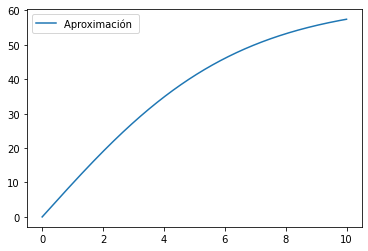

In [27]:
c_d = 0.225
m = 90
g = 9.81

b = c_d/m
a = sqrt(g/b)
k = 2*sqrt(g*b)


import numpy as np
import matplotlib.pyplot as plt
def f(t,v):
    return g-c_d/m*v**2

h = 0.0001
a = 0
b = 10
n = (b-a)/h


t = np.arange(a,b+h, h)
v = np.ones(int(n)+1)


v[0] = 0 

for i in range(0,int(n)):
    v[i+1]= v[i]+f(t[i],v[i])*h
plt.plot(t,v,label="Aproximación ")
plt.legend()
plt.show()


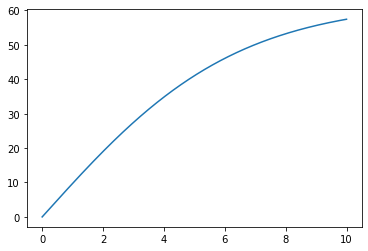

In [34]:
from scipy.interpolate import interp1d
g = interp1d(t,v, kind="linear")
plt.plot(t,g(t))

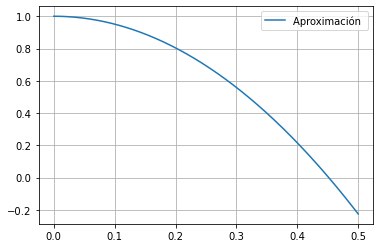

In [36]:
h = 0.0001
a = 0
b = 0.5
n = (b-a)/h


t = np.arange(a,b+h, h)
y = np.ones(int(n)+1)


y[0] = 1 

for i in range(0,int(n)):
    y[i+1]= y[i]-g(t[i])*h
plt.plot(t,y,label="Aproximación ")
plt.legend()
plt.grid()
plt.show()

In [40]:
for i in range(len(y)):
    if y[i]*y[i+1] <= 0:
        print(t[i])
        break


0.45170000000000005


# Problema 2
En la investigacion de un homicidio o de una muerte accidental, con frecuencia es importante estimar el tiempo que ha transcurrido desde la muerte. De observaciones experimentales, se sabe que la temperatura superficial de un objeto cambia con una tasa proporcional a la diferencia entre la temperatura del objeto y la del ambiente circundante, o temperatura ambiente. Esto se conoce como ley de Newton del enfriamiento. As ́ı, si $T(t)$ es la temperatura del objeto al tiempo $t$, y $T_a$ es la temperatura ambiente constante:


$$\frac{dT}{dt}=-K(T-T_a)$$

donde $K > 0$ es una constante de proporcionalidad. Suponga que en el momento $t = 0$ se descubre un cuerpo y se mide
su temperatura, $T_0$. Se supone que en el momento de la muerte, la temperatura del cuerpo, $T_d$, era el valor normal de
$37°C$. Suponga que la temperatura del cuerpo al ser descubierto era de $29.5°C$ , y que dos horas despues era de $23.5°C$

La temperatura ambiente es de $20°C$.

1. Determine K y el tiempo de la muerte.


2. Resuelva con el metodo de Euler. Dar un paso adecuado (h) y usar un programa.

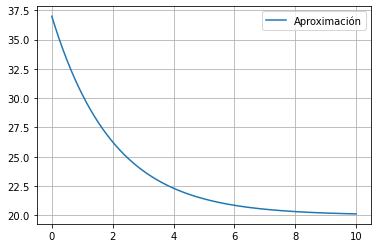

In [24]:
import numpy as np
import matplotlib.pyplot as plt
K

def f(T,t):
    return -0.49926*(T-20)

h = 0.0001
a = 0
b = 10
n = (b-a)/h


t = np.arange(a,b+h, h)
T = np.ones(int(n)+1)


T[0] = 37 

for i in range(0,int(n)):
    T[i+1]= T[i]+f(T[i],t[i])*h
plt.plot(t,T,label="Aproximación")
plt.legend()
plt.grid()
plt.show()

In [25]:
for i in range(len(t)):
    if((T[i]-29.5)*(T[i+1]-29.5)<=0):
        print(t[i])
        break

1.1655


Tiempo hallado analiticamente: 1.1655

Error : 0%